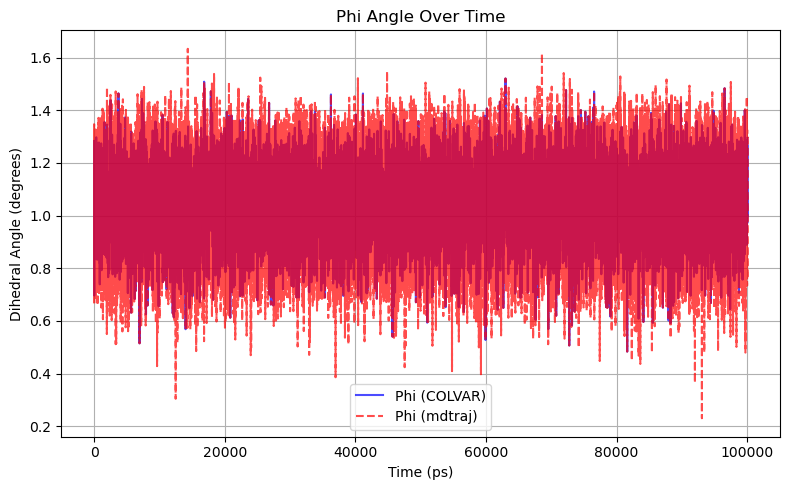

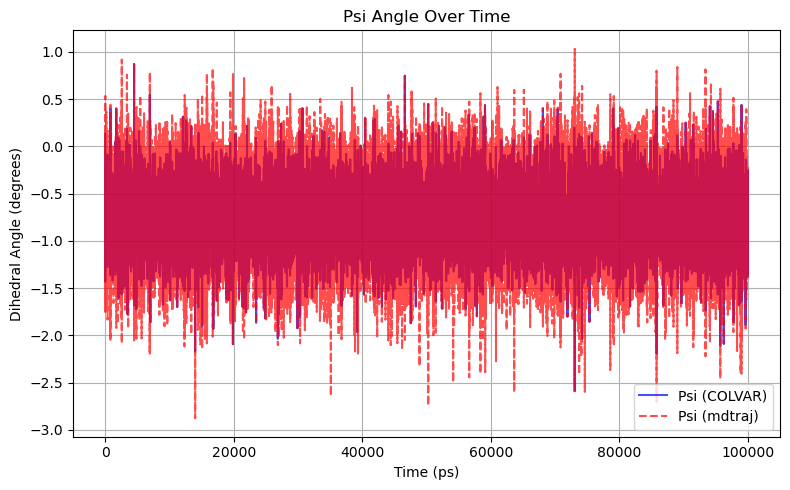

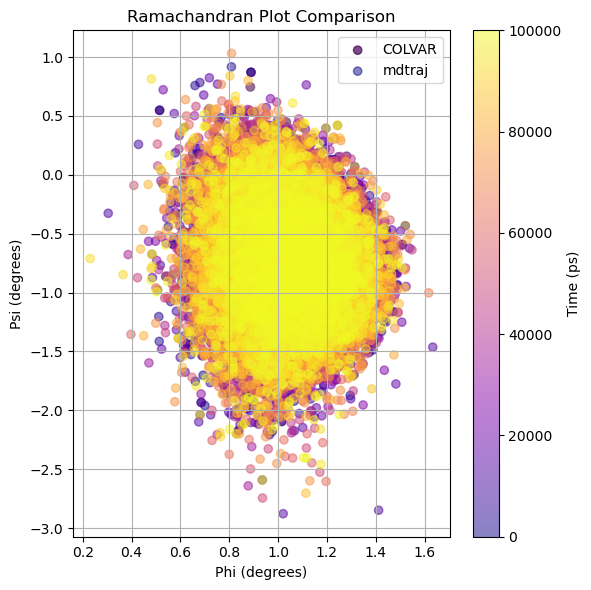

Standard Deviation of Phi: 0.1321 degrees
Standard Deviation of Psi: 0.3417 degrees


In [1]:

import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt

# Load the trajectory
# Replace 'trajectory.xtc' with your actual .xtc file and 'alanine_dipeptide.pdb' with your reference structure.
traj = md.load('traj_comp.xtc', top='dialaB.pdb')

# Compute the phi and psi angles using mdtraj
phi_indices, phi_mdtraj = md.compute_phi(traj)
psi_indices, psi_mdtraj = md.compute_psi(traj)

# Keep the dihedral angles as they are (in radians) since no conversion is needed
# (Here we're assuming COLVAR also provides angles in degrees)
# If the COLVAR file is already in degrees, then we're good to go.

# Read in the COLVAR file using numpy, assuming it has no header or comments
data = np.loadtxt('COLVAR')

# Extract time, phi, and psi from the COLVAR data
time_colvar = data[:, 0]  # First column is time in ps
phi_colvar = data[:, 1]   # Second column: phi angle in degrees
psi_colvar = data[:, 2]   # Third column: psi angle in degrees

# Define the time step per frame in ps (2 ps per frame)
timestep = 1.0  # Based on the provided parameters (1000 steps * 0.002 ps)

# Create the time array for mdtraj data
time_mdtraj = np.arange(0, timestep * len(phi_mdtraj), timestep)

# Ensure that the time_mdtraj array matches the length of phi_mdtraj
time_mdtraj = time_mdtraj[:len(phi_mdtraj)]

# Plot the phi angle over time with both COLVAR and mdtraj data
plt.figure(figsize=(8, 5))
plt.plot(time_colvar, phi_colvar, label='Phi (COLVAR)', color='blue', alpha=0.7)
plt.plot(time_mdtraj, phi_mdtraj, label='Phi (mdtraj)', color='red', linestyle='--', alpha=0.7)
plt.xlabel('Time (ps)')
plt.ylabel('Dihedral Angle (degrees)')
plt.title('Phi Angle Over Time')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('alanine_dipeptide_B_Phi_Comparison .png')
plt.show()

# Plot the psi angle over time with both COLVAR and mdtraj data
plt.figure(figsize=(8, 5))
plt.plot(time_colvar, psi_colvar, label='Psi (COLVAR)', color='blue', alpha=0.7)
plt.plot(time_mdtraj, psi_mdtraj, label='Psi (mdtraj)', color='red', linestyle='--', alpha=0.7)
plt.xlabel('Time (ps)')
plt.ylabel('Dihedral Angle (degrees)')
plt.title('Psi Angle Over Time')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('alanine_dipeptide_B_Psi_Comparison.png')
plt.show()

# Optional: Ramachandran-style plot comparing phi and psi from both sources
plt.figure(figsize=(6, 6))
plt.scatter(phi_colvar, psi_colvar, c=time_colvar, cmap='viridis', alpha=0.7, label='COLVAR')
plt.scatter(phi_mdtraj, psi_mdtraj, c=time_mdtraj, cmap='plasma', alpha=0.5, label='mdtraj')
plt.colorbar(label='Time (ps)')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.title('Ramachandran Plot Comparison')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('alanine_dipeptide_B_Comparison_Ramachandran_Plot.png')
plt.show()

# Compute the standard deviation of phi and psi from the COLVAR data
phi_std = np.std(phi_colvar)
psi_std = np.std(psi_colvar)

# Print the results
print(f"Standard Deviation of Phi: {phi_std:.4f} degrees")
print(f"Standard Deviation of Psi: {psi_std:.4f} degrees")
